In [1]:
import pandas as pd
invoice_df = pd.read_csv('Downloads/fct_invoice.csv')
customer_df = pd.read_json('Downloads/dim_customer.json')

invoice_df.head() 

,invoice_no,customer_id,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,229,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,3433,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,644,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,4900,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,1089,Books,4,60.60,Cash,24/10/2021,Kanyon


In [2]:
customer_df.head() 

,age,first_name,gender,id,last_name
0,48.0,Nicholas,M,0,Flores
1,NaN,Jeffery,M,1,Rowe
2,57.0,Alexis,F,2,Benton
3,73.0,Amy,F,3,Johnson
4,20.0,David,M,4,Moore


EASY 1. How many unique customers are in the dataset?

In [3]:
customers = invoice_df['customer_id']

print(customers.nunique())

5191


2. What are the different categories of products available? How many unique categories are there?

In [4]:
categories = invoice_df['category']

print(categories.unique())
print(categories.nunique())

['Clothing' 'Shoes' 'Books' 'Cosmetics' 'Food & Beverage' 'Toys'
 'Technology' 'Souvenir']
8


3. Which payment method is the most popular? How many times was it used?

In [5]:
payment = invoice_df['payment_method'].value_counts().nlargest(1)

print(payment)

Cash    44447
Name: payment_method, dtype: int64


MEDIUM 1. What are the three most popular categories, by total sales?

In [6]:
invoice_df['sales'] = invoice_df['price'] * invoice_df['quantity']
#get sales for each row

total_sales = invoice_df.groupby('category')['sales'].sum().nlargest(3)
#get total sales for each category and get top 3 categories

print(total_sales)

category
Clothing      1.139968e+08
Shoes         6.655345e+07
Technology    5.786235e+07
Name: sales, dtype: float64


2. What are the total sales attributed to customers over the age of 45?

In [7]:
filtered_customer_df = customer_df.loc[customer_df['age'] > 45]  
#filter customer_df based on the condition

merged_df = pd.merge(invoice_df, filtered_customer_df, left_on='customer_id', right_on='id', how='inner')  
#join two dfs 

total_sales = merged_df['sales'].sum()  

print(total_sales)


82039768.15


3. How is the data distributed across different invoice dates? Are there any seasonal trends or patterns? (Use a graph for this.)

C:\Users\Annika\AppData\Local\Temp\ipykernel_9616\1084879577.py:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  invoice_df['invoice_date'] = pd.to_datetime(invoice_df['invoice_date'])


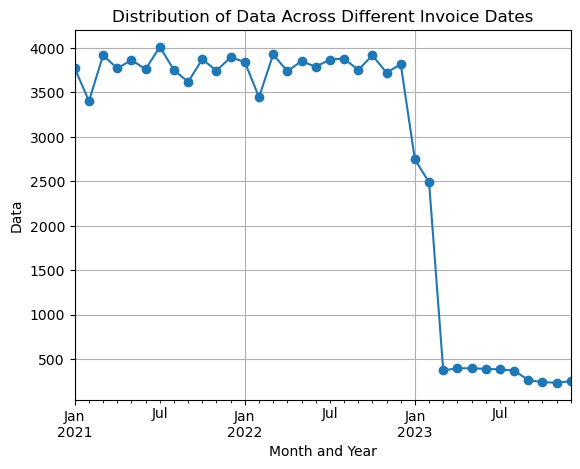

In [8]:
import matplotlib.pyplot as plt

invoice_df['invoice_date'] = pd.to_datetime(invoice_df['invoice_date'])
#convert 'invoice_date' column to datetime format
invoice_df['month_year'] = invoice_df['invoice_date'].dt.to_period('M')
#extract month and year from 'invoice_date' column
monthly_counts = invoice_df['month_year'].value_counts().sort_index()
#count number of invoices for each month

monthly_counts.plot(kind='line', marker='o')
plt.title('Distribution of Data Across Different Invoice Dates')
plt.xlabel('Month and Year')
plt.ylabel('Data')
plt.grid(True)
plt.show()

HARD 1. Create a pivot table showing the breakdown of sales across these dimensions, in this order: category, decade age range (e.g., 10-19, 20-29, and so forth).

In [9]:
combined_df = pd.merge(customer_df, invoice_df, left_on='id', right_on='customer_id')
#merge age and sales data based on customer_id column

combined_df['decade'] = pd.cut(combined_df['age'], bins=range(10, 101, 10), right=False)
#create new column for decade age range

pivot_table = pd.pivot_table(combined_df, values='price', index='category', columns='decade', aggfunc='sum')
#pivot table showing breakdown of sales by category and decade age range

print(pivot_table)

decade            [10, 20)    [20, 30)    [30, 40)    [40, 50)    [50, 60)  \
category                                                                     
Books              3469.35    21619.05    22997.70    23361.30    20664.60   
Clothing         518238.16  2818351.36  3074919.76  3066817.60  2803647.44   
Cosmetics         29681.80   165079.60   198054.86   181343.60   160932.28   
Food & Beverage    3645.31    20428.38    23744.20    24460.71    19999.52   
Shoes            274277.69  1630061.72  1912141.62  1889335.16  1591650.84   
Souvenir           3296.13    15295.92    17548.08    17759.22    15084.78   
Technology       287700.00  1426950.00  1669500.00  1630650.00  1220100.00   
Toys              17203.20   102466.56   115297.28   106910.72    94115.84   

decade             [60, 70)    [70, 80)    [80, 90)  [90, 100)  
category                                                        
Books              21513.00    15437.85     7575.00        0.0  
Clothing         2910776